<a href="https://colab.research.google.com/github/cecilia-24/-Modelo-de-Examen-Final-Tipo-2-/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: armame un dataframe de al menos 100 filas con datos random con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Lista de materias escolares argentinas
materias = [
    "Matemática", "Lengua y Literatura", "Historia", "Geografía", "Ciencias Naturales",
    "Educación Física", "Inglés", "Formación Ética y Ciudadana", "Artes", "Música",
    "Tecnología", "Biología", "Física", "Química", "Filosofía"
]

# Generar datos aleatorios para 100 filas
n_filas = 100
data = {
    'Apellido': [f'Apellido_{i}' for i in range(n_filas)],
    'Nombre': [f'Nombre_{i}' for i in range(n_filas)],
    'nro_dni': [random.randint(10000000, 99999999) for _ in range(n_filas)],
    'materia escolar': [random.choice(materias) for _ in range(n_filas)],
    'nota 1er Trimestre': [random.randint(1, 10) for _ in range(n_filas)],
    'nota 2do Trimestre': [random.randint(1, 10) for _ in range(n_filas)],
    'nota 3er Trimestre': [random.randint(1, 10) for _ in range(n_filas)],
    'Faltas a clases': [random.randint(0, 20) for _ in range(n_filas)]
}

# Crear el DataFrame
df = pd.DataFrame(data)

# Mostrar las primeras 10 filas
print(df.head(10))

     Apellido    Nombre   nro_dni      materia escolar  nota 1er Trimestre  \
0  Apellido_0  Nombre_0  22078365            Geografía                   6   
1  Apellido_1  Nombre_1  41120691            Filosofía                   3   
2  Apellido_2  Nombre_2  50616598               Inglés                   6   
3  Apellido_3  Nombre_3  24140556   Ciencias Naturales                   6   
4  Apellido_4  Nombre_4  59749008           Tecnología                   3   
5  Apellido_5  Nombre_5  52800014            Filosofía                   5   
6  Apellido_6  Nombre_6  55717430  Lengua y Literatura                  10   
7  Apellido_7  Nombre_7  25601270              Química                   4   
8  Apellido_8  Nombre_8  90910936            Geografía                   7   
9  Apellido_9  Nombre_9  50805478               Física                   3   

   nota 2do Trimestre  nota 3er Trimestre  Faltas a clases  
0                   9                   8                5  
1                  

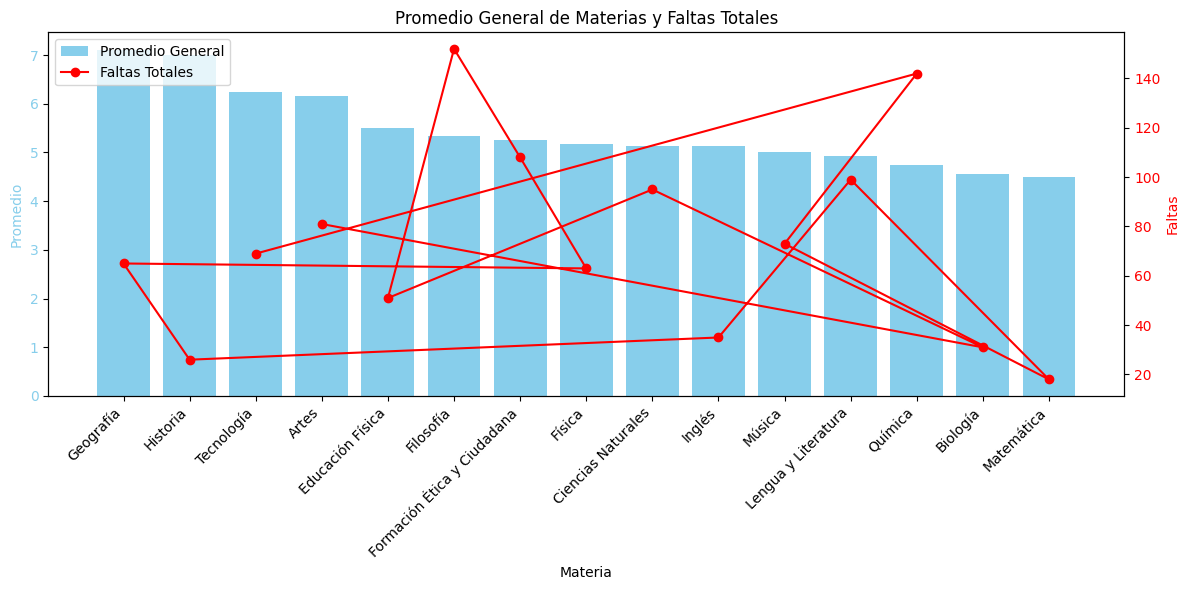

In [2]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor constrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import matplotlib.pyplot as plt
import pandas as pd

# Calcular el promedio general de cada materia
promedios_materias = df.groupby('materia escolar')[['nota 1er Trimestre', 'nota 2do Trimestre', 'nota 3er Trimestre']].mean().mean(axis=1)

# Ordenar las materias por promedio de mayor a menor
promedios_ordenados = promedios_materias.sort_values(ascending=False)

# Calcular las faltas totales por materia
faltas_por_materia = df.groupby('materia escolar')['Faltas a clases'].sum()

# Crear el gráfico de barras
fig, ax1 = plt.subplots(figsize=(12, 6))

# Barras para los promedios
ax1.bar(promedios_ordenados.index, promedios_ordenados.values, color='skyblue', label='Promedio General')
ax1.set_xlabel('Materia')
ax1.set_ylabel('Promedio', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_title('Promedio General de Materias y Faltas Totales')
plt.xticks(rotation=45, ha='right') # Rotar etiquetas del eje x para mejor visualización


# Segundo eje Y para las faltas
ax2 = ax1.twinx()
ax2.plot(faltas_por_materia.index, faltas_por_materia.values, color='red', marker='o', label='Faltas Totales')
ax2.set_ylabel('Faltas', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Agregar leyendas
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')


plt.tight_layout()
plt.show()

In [3]:
df.to_csv("datos_alumnos.csv", index=False)